Forecasting sales of one factory

**Step 1**

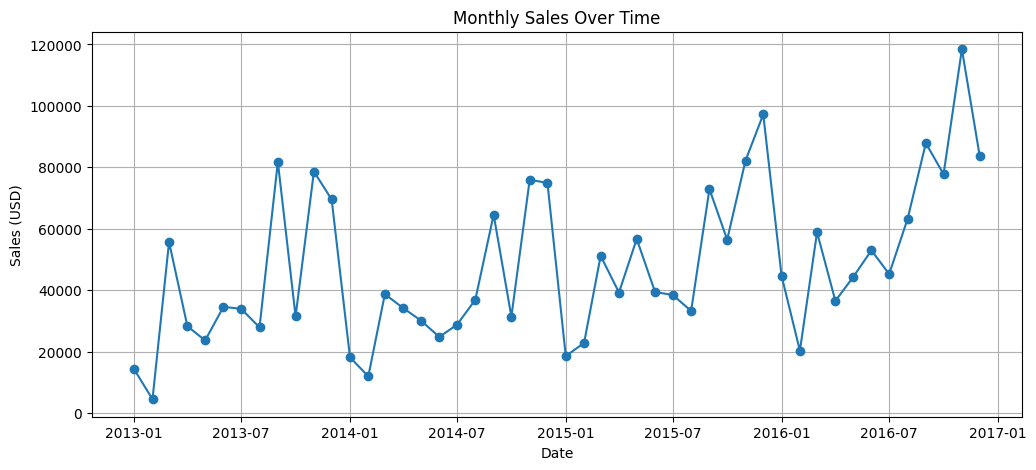

,ds,y
0,2013-01-01,14236.90
1,2013-02-01,4519.89
2,2013-03-01,55691.01
3,2013-04-01,28295.35
4,2013-05-01,23648.29


In [6]:
import matplotlib.pyplot as plt
import pandas as pd


# Load the CSV file
df = pd.read_csv('/content/sample_data/monthly_sales.csv')

# Rename columns for Prophet
df_prophet = df.rename(columns={'date': 'ds', 'sales': 'y'})

# Convert to datetime format
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Sort values just in case
df_prophet = df_prophet.sort_values('ds')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.show()

df_prophet.head()

**Step 2**

In [7]:
!pip install prophet
from prophet import Prophet

# Create and fit the model
model = Prophet()
model.fit(df_prophet)

#Let’s tell Prophet to predict the next 12 months:

# Create future dates (12 months ahead)
future = model.make_future_dataframe(periods=12, freq='M')

# Make predictions
forecast = model.predict(future)

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps94aqser/9bvlmv91.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps94aqser/zjr05mcz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77108', 'data', 'file=/tmp/tmps94aqser/9bvlmv91.json', 'init=/tmp/tmps94aqser/zjr05mcz.json', 'output', 'file=/tmp/tmps94aqser/prophet_modelp6i03zmo/prophet_model-20250704184254.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:42:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:42:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

,ds,yhat,yhat_lower,yhat_upper
48,2016-12-31,50820.681507,42773.098520,58521.847957
49,2017-01-31,28681.847083,20762.796603,36482.710547
50,2017-02-28,57293.862759,49372.258350,65192.624007
51,2017-03-31,61802.722592,53827.180773,69999.955283
52,2017-04-30,79596.923728,71753.236276,87902.647939
53,2017-05-31,52084.811100,44146.132077,59744.270750
54,2017-06-30,65600.921657,58095.748058,73447.967870
55,2017-07-31,54787.531252,46824.308343,62544.183770
56,2017-08-31,100925.948017,93165.545244,108488.168369
57,2017-09-30,72778.917185,64135.240470,80002.220330


Step 3

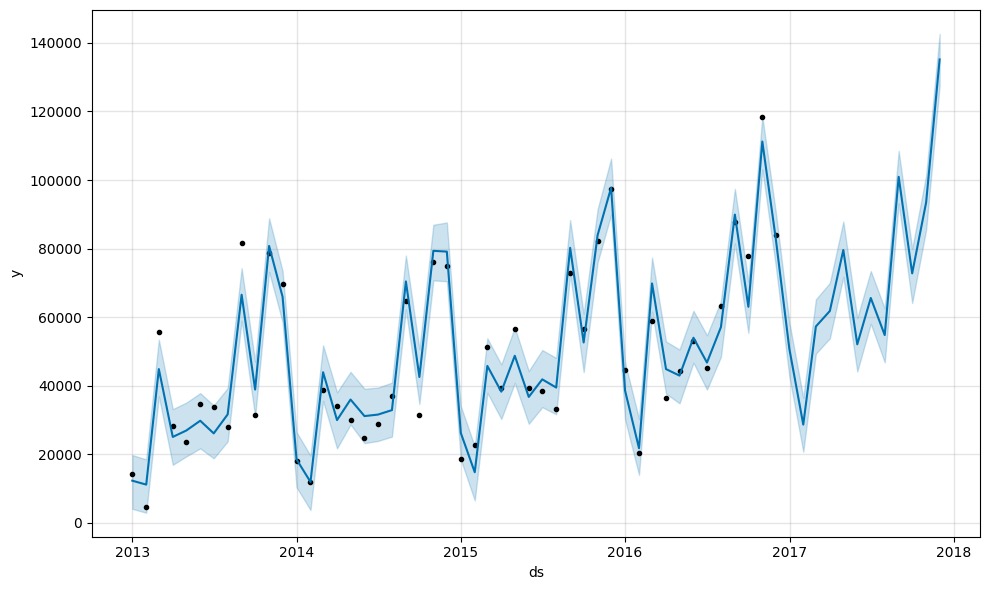

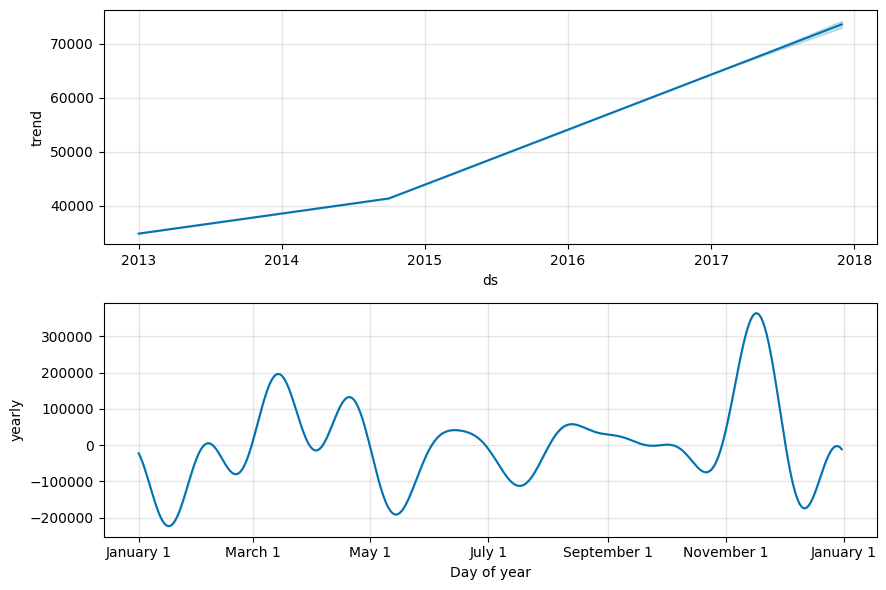

In [8]:
# Visualize forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In this project, we successfully applied Facebook Prophet to build a forecasting model for monthly retail sales. By training on historical data from 2013 onward, the model automatically detected underlying trends and seasonal patterns, enabling us to project future sales for the next 12 months with high interpretability and flexibility.

Prophet’s simplicity allowed for rapid development, yet its underlying mathematical model remains powerful. It provided not only point forecasts but also confidence intervals, helping us quantify uncertainty — a key factor in real-world decision-making.

This type of forecasting can support business areas such as:

📦 Inventory planning

📅 Budgeting and goal setting

📊 Strategic marketing campaigns

Overall, this project demonstrates the ability to use modern time series techniques for real-world business insights — a valuable skill for any Data Scientist